In [1]:
import os
import numpy as np
import pandas as pd

import math
import random

import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format='retina'

rcParams['figure.figsize'] = 8, 4

from config import *
from utils import get_dir_of_obj, dataframe_from_file

## To Print multiple lines without "print" or "display" comand
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"


Dataset

In [44]:
df_train = dataframe_from_file(TRAIN_PATH)
df_val = dataframe_from_file(VAL_PATH)
df_test = dataframe_from_file(TEST_PATH)


In [63]:
print(df_train.shape)
df_train.head()


(32061, 6)


,class,x1,x2,y1,y2,img_name
0,5.0,0.092188,0.214844,0.183984,0.135937,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...
0,5.0,0.092188,0.111719,0.128516,0.173437,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...
0,5.0,0.345313,0.127344,0.131250,0.113672,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...
0,5.0,0.635938,0.138281,0.166406,0.179297,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...
0,5.0,0.745313,0.498437,0.352344,0.471875,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...


(array([422.,   0., 174.,   0., 366.,   0., 511.,   0.,  87.,  76.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

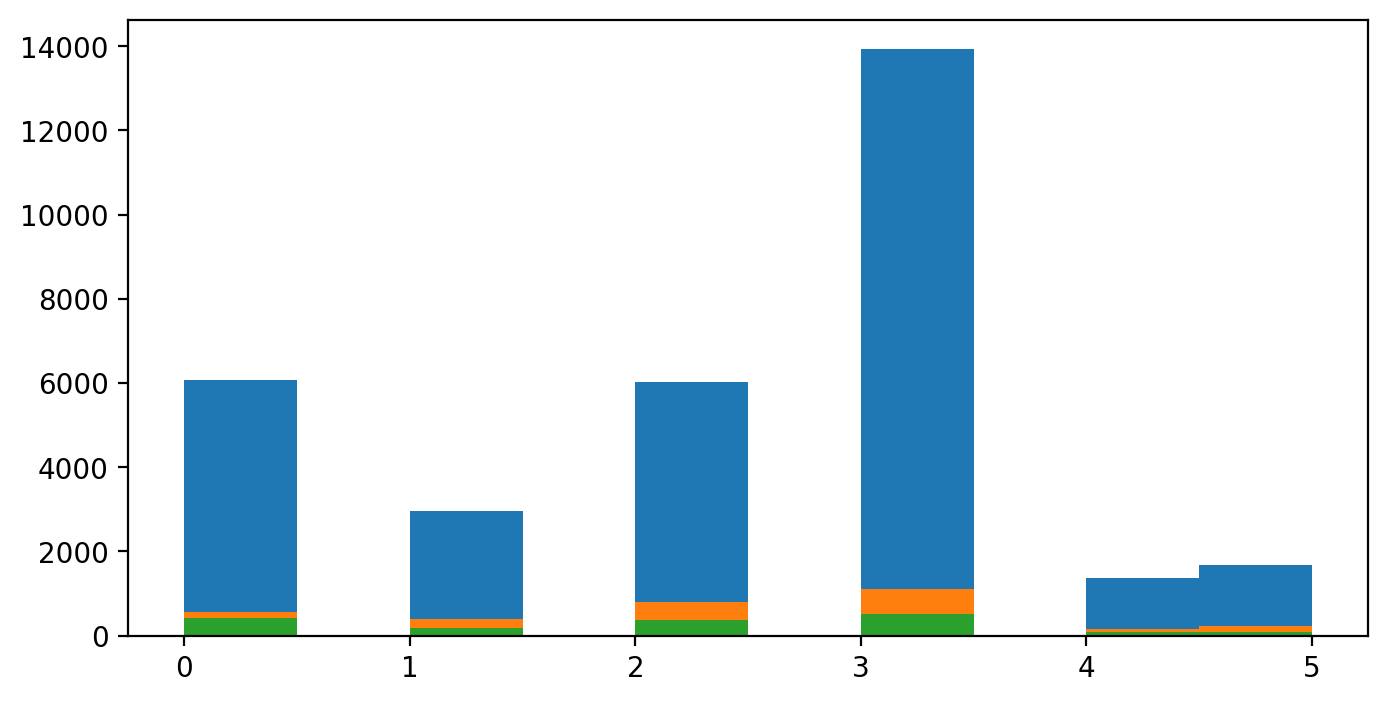

In [47]:
plt.hist(df_train['class'])
plt.hist(df_val['class'])
plt.hist(df_test['class'])

In [61]:

df_train[df_train['class'] == 0].iloc[10]['img_name']

'004e8f8aa9860565_jpg.rf.6747c1847e131c0675564433ab5cd362.txt'